# Explore confidence scores with Wav2Vec

In [1]:
from confidence_utils import *

from datasets import load_dataset
from IPython.display import HTML as html_print
import matplotlib.pyplot as plt

## 1. Load data

In [2]:
fleurs_en = load_dataset("google/fleurs", "en_us")
fleurs_en = fleurs_en.remove_columns(['id', 'num_samples', 'path', 'gender', 'lang_id', 'language', 'lang_group_id'])
fleurs_en = fleurs_en['train']

Found cached dataset fleurs (/home/antonin/.cache/huggingface/datasets/google___fleurs/en_us/2.0.0/aabb39fb29739c495517ac904e2886819b6e344702f0a5b5283cb178b087c94a)


  0%|          | 0/3 [00:00<?, ?it/s]

## 2. Load models

In [3]:
processor, model = load_wav2vec_model("patrickvonplaten/wav2vec2-base-960h-4-gram")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at patrickvonplaten/wav2vec2-base-960h-4-gram and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.7/site-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in 'snapshot_download': allow_regex. Will not be supported from version '0.12'.

Please use `allow_patterns` and `ignore_patterns` instead.
  warnings.warn(message, FutureWarning)


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

## 3. Run inference test

In [4]:
fleurs_en = fleurs_en.map(map_to_pred, 
    fn_kwargs={"model": model, "processor": processor}, 
    remove_columns=['audio'])
fleurs_en

  0%|          | 0/10 [00:00<?, ?ex/s]

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_ra

Dataset({
    features: ['transcription', 'raw_transcription', 'string_pred', 'tokens_pred', 'probs_tokens_pred', 'ground_truth', 'wer'],
    num_rows: 10
})

## 4. Save processed data with confidence indicators

In [ ]:
fleurs_en.save_to_disk(os.path.join(predictions_confidence_path, 'fleurs_en'))

## 5. Load processed data with confidence indicators

In [ ]:
fleurs_en = load_from_disk(os.path.join(predictions_confidence_path, 'fleurs_en'))
fleurs_en

Dataset({
    features: ['transcription', 'raw_transcription'],
    num_rows: 10
})

## 6. Display confidence colors

In [ ]:
html_print(html_display_confidence(fleurs_en, range(10)))

KeyError: 'tokens_pred'

## 7. Time to analyze

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [ ]:
# instantiate dict of heuristics
heuristics = dict({'wer':[], 'avg_prob_tokens':[]})

# fill dict
for row in fleurs_en:
    heuristics['wer'].append(row['wer'])
    heuristics['avg_prob_tokens'].append(np.mean(row['probs_tokens_pred']))

# export to pd dataframe
heuristics = pd.DataFrame.from_dict(heuristics)

# remove outliers
heuristics = heuristics[(np.abs(stats.zscore(heuristics)) < 3).all(axis=1)]

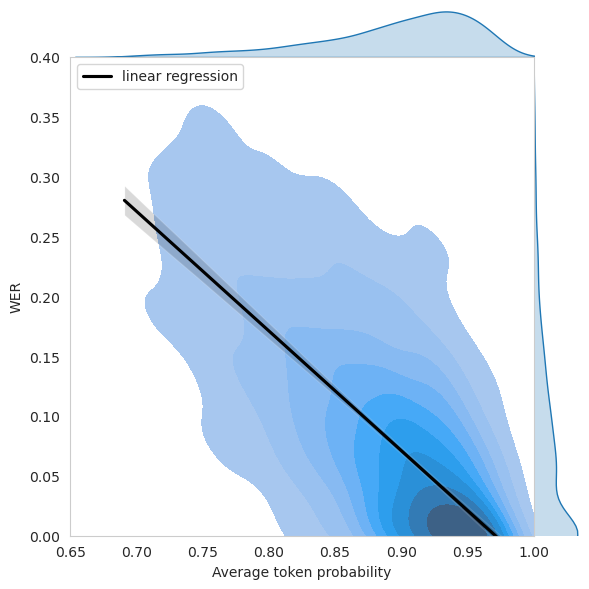

In [ ]:
#sns.set(font_scale = 1.1)
sns.set_style("whitegrid", {'axes.grid' : False})
jp = sns.jointplot(data=heuristics, x="avg_prob_tokens", y="wer", 
              kind="kde", fill = True, xlim = [0.65,1], ylim = [0,0.4],
              ratio = 10, space = 0, marginal_ticks = False, palette = "mako"
             )
jp.plot_joint(sns.regplot, color="black", scatter=None, ci=95, label='linear regression')
jp.set_axis_labels("Average token probability", "WER")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(loc = "upper left")

## With Wav2Vec with 4gram

In [ ]:
from transformers import AutoModelForCTC, AutoProcessor
from datasets import load_dataset
import datasets
import torch
import sys          
import kenlm                                                 
model_id = "patrickvonplaten/wav2vec2-base-960h-4-gram"                                                                                            

model = AutoModelForCTC.from_pretrained(model_id)         
processor = AutoProcessor.from_pretrained(model_id)
num_samples = 20

dataset = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
samples = dataset[:num_samples]                                                                                              
audio_samples = [s["array"] for s in samples["audio"]]
sampling_rate = set([s["sampling_rate"] for s in samples["audio"]]).pop() 
text_samples = samples["text"]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at patrickvonplaten/wav2vec2-base-960h-4-gram and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/395 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in 'snapshot_download': allow_regex. Will not be supported from version '0.12'.

Please use `allow_patterns` and `ignore_patterns` instead.
  warnings.warn(message, FutureWarning)


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/198 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.12G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/78.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset librispeech_asr_dummy downloaded and prepared to /home/antonin/.cache/huggingface/datasets/patrickvonplaten___librispeech_asr_dummy/clean/2.1.0/f2c70a4d03ab4410954901bde48c54b85ca1b7f9bf7d616e7e2a72b5ee6ddbfc. Subsequent calls will reuse this data.
